In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.close('all')

In [5]:
movies = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\Project 3\data\ml-latest-small\ml-latest-small\movies.csv")

In [6]:
print("Column names: %s" % str(movies.columns))

Column names: Index(['movieId', 'title', 'genres'], dtype='object')


In [7]:
ratings = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\Project 3\data\ml-latest-small\ml-latest-small\ratings.csv")

In [8]:
print("Column names: %s" % str(ratings.columns))

Column names: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [9]:
links = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\Project 3\data\ml-latest-small\ml-latest-small\links.csv")

In [10]:
print("Column names: %s" % str(links.columns))

Column names: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [11]:
tags = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\Project 3\data\ml-latest-small\ml-latest-small\tags.csv")

In [12]:
print("Column names: %s" % str(tags.columns))

Column names: Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [13]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [14]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [15]:
ratings["rating"].mean()

3.501556983616962

In [16]:
ratings[ratings.movieId == 1]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [17]:
ratings[['rating']].where(ratings[['movieId']].values == 1).stack().mean()

3.9209302325581397

In [18]:
movies.insert(1, "AvgRating", 0.0)

In [19]:
movies

,movieId,AvgRating,title,genres
0,1,0.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,0.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,0.0,Grumpier Old Men (1995),Comedy|Romance
3,4,0.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,0.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
9737,193581,0.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,0.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,0.0,Flint (2017),Drama
9740,193587,0.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [20]:
def calculate_avg(row):
    return ratings[['rating']].where(ratings[['movieId']].values == row['movieId']).stack().mean()

In [21]:
movies['AvgRating'] = movies.apply(calculate_avg, axis=1)
movies

,movieId,AvgRating,title,genres
0,1,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
9737,193581,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,3.500000,Flint (2017),Drama
9740,193587,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [22]:
movies.insert(1, "NumRating", 0)

In [23]:
movies

,movieId,NumRating,AvgRating,title,genres
0,1,0,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,0,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,0,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,0,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,0,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,0,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,0,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,0,3.500000,Flint (2017),Drama
9740,193587,0,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [24]:
def calculate_numRatings(row):
    return ratings[['rating']].where(ratings[['movieId']].values == row['movieId']).stack().nunique()

In [25]:
movies['NumRating'] = movies.apply(calculate_numRatings, axis=1)
movies

,movieId,NumRating,AvgRating,title,genres
0,1,9,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,10,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,9,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,4,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,9,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,1,3.500000,Flint (2017),Drama
9740,193587,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [26]:
movies.insert(1, "allTags", "Empty")
movies

,movieId,allTags,NumRating,AvgRating,title,genres
0,1,Empty,9,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Empty,10,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,Empty,9,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,Empty,4,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Empty,9,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
9737,193581,Empty,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,Empty,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Empty,1,3.500000,Flint (2017),Drama
9740,193587,Empty,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [27]:
tags[['tag']].where(tags[['movieId']].values == 5).stack().str.cat(sep='|')

'pregnancy|remake'

In [28]:
def calculate_tags(row):
    return tags[['tag']].where(tags[['movieId']].values == row['movieId']).stack().str.cat(sep='|')

movies.apply(calculate_tags, axis=1)

0                                    pixar|pixar|fun
1       fantasy|magic board game|Robin Williams|game
2                                          moldy|old
3                                                   
4                                   pregnancy|remake
                            ...                     
9737                                                
9738                                                
9739                                                
9740                                                
9741                                                
Length: 9742, dtype: object

In [29]:
movies['allTags'] = movies.apply(calculate_tags, axis=1)
movies

,movieId,allTags,NumRating,AvgRating,title,genres
0,1,pixar|pixar|fun,9,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,fantasy|magic board game|Robin Williams|game,10,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,moldy|old,9,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,,4,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,pregnancy|remake,9,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
9737,193581,,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,,1,3.500000,Flint (2017),Drama
9740,193587,,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [30]:
uniqueTags = tags['tag'].unique()

In [31]:
uniqueTags

array(['funny', 'Highly quotable', 'will ferrell', ..., 'gun fu',
       'heroic bloodshed', 'Heroic Bloodshed'], dtype=object)

In [32]:
movies['NumRating'].max

<bound method Series.max of 0        9
1       10
2        9
3        4
4        9
        ..
9737     1
9738     1
9739     1
9740     1
9741     1
Name: NumRating, Length: 9742, dtype: int64>

In [33]:
#Building K-means
#From: https://www.datacamp.com/community/tutorials/k-means-clustering-python
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
train = movies
train

,movieId,allTags,NumRating,AvgRating,title,genres
0,1,pixar|pixar|fun,9,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,fantasy|magic board game|Robin Williams|game,10,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,moldy|old,9,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,,4,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,pregnancy|remake,9,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
9737,193581,,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,,1,3.500000,Flint (2017),Drama
9740,193587,,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [35]:
test = movies
test

,movieId,allTags,NumRating,AvgRating,title,genres
0,1,pixar|pixar|fun,9,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,fantasy|magic board game|Robin Williams|game,10,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,moldy|old,9,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,,4,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,pregnancy|remake,9,3.071429,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
9737,193581,,1,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,,1,3.500000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,,1,3.500000,Flint (2017),Drama
9740,193587,,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [36]:
print(train.columns.values)

['movieId' 'allTags' 'NumRating' 'AvgRating' 'title' 'genres']


In [37]:
# where are the values missing
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
movieId       0
allTags       0
NumRating     0
AvgRating    18
title         0
genres        0
dtype: int64


*****In the test set*****
movieId       0
allTags       0
NumRating     0
AvgRating    18
title         0
genres        0
dtype: int64


In [38]:
# Fill missing values with 0.0 rating
train.fillna(0.0, inplace=True)
test.fillna(0.0, inplace=True)

In [39]:
train['genres'].head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [40]:
#Find the genres with "Adventure" in them
# selecting rows based on condition 
#rslt_df = dataframe[dataframe['Percentage'] > 80]

funOnly = train[train['allTags'].str.contains(r"fun", na=False)]
funOnly

,movieId,allTags,NumRating,AvgRating,title,genres
0,1,pixar|pixar|fun,9,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
35,39,chick flick|funny|Paul Rudd|quotable|seen more...,10,3.293269,Clueless (1995),Comedy|Romance
257,296,good dialogue|great soundtrack|non-linear|cult...,9,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
946,1247,Simon and Garfunkel,8,4.063291,"Graduate, The (1967)",Comedy|Drama|Romance
1298,1732,Coen Brothers|black comedy|bowling|classic|coe...,10,3.924528,"Big Lebowski, The (1998)",Comedy|Crime
2031,2706,best comedy|Chris Klein|dumb|Jason Biggs|not f...,10,3.378641,American Pie (1999),Comedy|Romance
2224,2953,family|funny|Macaulay Culkin|sequel,9,2.516129,Home Alone 2: Lost in New York (1992),Children|Comedy
2355,3114,animation|Disney|funny|original|Pixar|sequel|T...,7,3.860825,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
6801,60756,funny|Highly quotable|will ferrell|comedy|funn...,8,3.553571,Step Brothers (2008),Comedy
7033,68848,Adrien Brody|con artists|funny|interesting cha...,2,4.333333,"Brothers Bloom, The (2008)",Adventure|Comedy|Crime|Romance


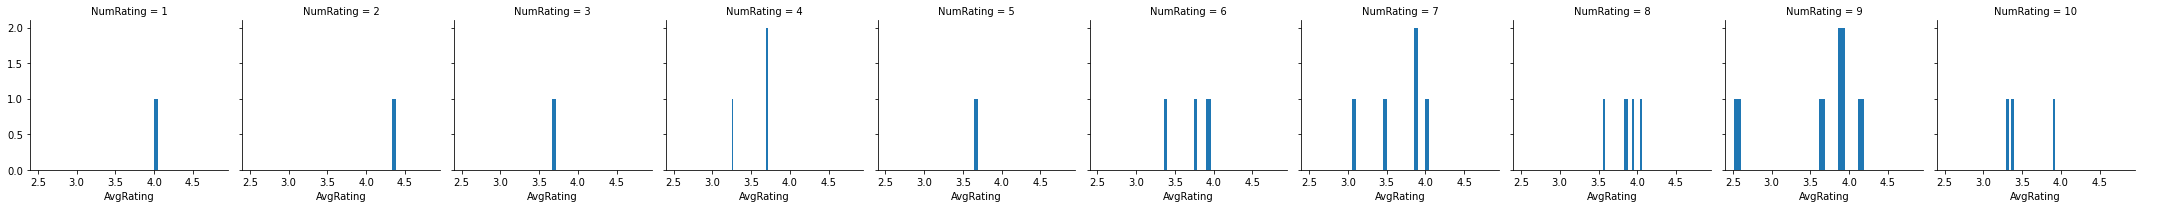

In [41]:
#Quick plotting. Let's do movies with a tag of 'fun'. x axis = rating, y axis number of reviews
g = sns.FacetGrid(funOnly, col='NumRating')
g.map(plt.hist,'AvgRating', bins=20)
g.add_legend()

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    9742 non-null   int64  
 1   allTags    9742 non-null   object 
 2   NumRating  9742 non-null   int64  
 3   AvgRating  9742 non-null   float64
 4   title      9742 non-null   object 
 5   genres     9742 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 456.8+ KB


In [43]:
#Drop unnecessary information (title, genre)
train = train.drop(['title','genres'], axis=1)
test = test.drop(['title','genres'], axis=1)

In [44]:
#Label encoding test
labelEncoder = LabelEncoder()
labelEncoder.fit(train['allTags'])
labelEncoder.fit(test['allTags'])

LabelEncoder()

In [45]:
train['allTags'] = labelEncoder.transform(train['allTags'])
test['allTags'] = labelEncoder.transform(test['allTags'])

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    9742 non-null   int64  
 1   allTags    9742 non-null   int32  
 2   NumRating  9742 non-null   int64  
 3   AvgRating  9742 non-null   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 266.5 KB


In [47]:
#Start building the k-means clustering
X = np.array(train.drop(['NumRating'], 1).astype(float))
y = np.array(train['NumRating'])

kmeans = KMeans(n_clusters=10) # You want cluster the movie records into 10, number of user reviews
kmeans.fit(X)

KMeans(n_clusters=10)

In [48]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.16762471771710122


In [49]:
#Let's try correcting this poor accuracy
kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=10)

In [50]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.1673167727366044


In [51]:
#This didn't help, maybe scaling?
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans.fit(X_scaled)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.06353931430917677


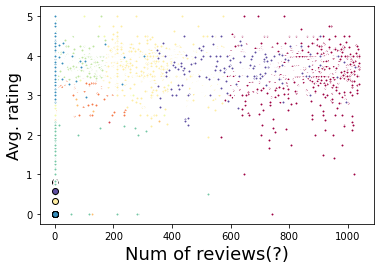

In [52]:
#Try plotting
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(kmeans.cluster_centers_)), colors):
    my_members = (kmeans.labels_ == k)
    cluster_center = kmeans.cluster_centers_[k]
    ax.plot(X[my_members, 1], X[my_members, 2], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.xlabel('Num of reviews(?)', fontsize=18)
plt.ylabel('Avg. rating', fontsize=16)
plt.show()